# Calcualte Safe threshold:

In [1]:
import os, sys
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pandas as pd
import os.path
from os import listdir
from os import listdir
import glob
import matplotlib.pyplot as plt
from model_validation import model_validation
from sklearn.metrics import accuracy_score
import numpy as np
from prepare_data import data_split
import json
import matplotlib as mpl
from os import listdir
from os.path import isfile, join

In [15]:
data_proton = np.loadtxt('/mnt/yggdrasil_scratch/mono-lst-sipm-pmma-3ns-v1_triggerless/safe_threshold/results/proton_nsb0x/rates/rate_scan_proton_nsbx0.txt', dtype=float, comments='#', delimiter = ' ')
data_nsb2x = np.loadtxt('/mnt/yggdrasil_scratch/mono-lst-sipm-pmma-3ns-v1_triggerless/safe_threshold/results/nsb2x/rate_scan_nsbx2_mono.txt', dtype=float, comments='#', delimiter = ' ')

In [10]:
data_proton[:,1]

array([ 46.11330698,  48.7483531 ,  51.38339921,  54.01844532,
        56.65349144,  59.28853755,  61.92358366,  64.55862978,
        67.19367589,  69.828722  ,  72.46376812,  75.09881423,
        77.73386034,  80.36890646,  83.00395257,  85.63899868,
        88.2740448 ,  90.90909091,  93.54413702,  96.17918314,
        98.81422925, 101.44927536, 104.08432148])

In [78]:
plt.plot(data_proton[:,0], 1.5*data_proton[:,2], '.-', label='1.5 x $f_{proton}$')
plt.plot(data_nsb2x[:,0], data_nsb2x[:,2], 'x-', label='2 x $f_{NSB}$')
plt.plot(525.7, 5941.1, 'or', label='safe threshold')
plt.grid()
plt.yscale('log')
plt.ylabel('f, Hz', fontsize=14)
plt.xlabel('Threshold, ADC', fontsize=14)
plt.xlim(300, 700)
#plt.ylim(1, 1.e8)
plt.legend(fontsize=14)
#plt.savefig('safe_threshold_asum.png', dpi=800)
plt.show()


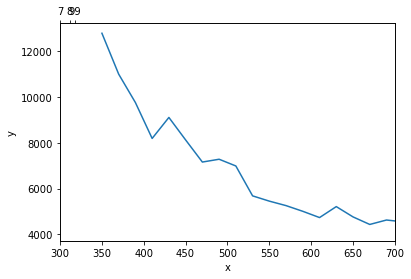

In [74]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(data_proton[:,0], 1.5*data_proton[:,2])

ax1.set_xlim(300, 700)
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2 = ax1.twiny()
#ax2.set_xlabel("x-transformed")
ax2.set_xlim(300, 700)
ax2.set_xticks([10, 30, 40])
ax2.set_xticklabels(['7','8','99'])

plt.show()

In [24]:
data_proton[:,0]/data_proton[:,1]

array([7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59])

In [76]:
data_proton[:,0]

array([350., 370., 390., 410., 430., 450., 470., 490., 510., 530., 550.,
       570., 590., 610., 630., 650., 670., 690., 710., 730., 750., 770.,
       790.])

In [25]:
data_nsb2x[:,0]/data_nsb2x[:,1]

array([7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59, 7.59,
       7.59, 7.59, 7.59, 7.59, 7.59, 7.59])